In [1]:
import pandas as pd
import PIL
import os
from collections import Counter
import shutil
import cv2
import numpy as np
import pytesseract
from matplotlib.pyplot import imshow
%matplotlib inline


## Optical Character recognition

<b>Optical character recognition (OCR) is process of classification of opti-
cal patterns contained in a digital image. The character recognition is achieved
through segmentation, feature extraction and classification.</b>

## Stages of Optical Character Recognition

Stages of Optical Character Recognition


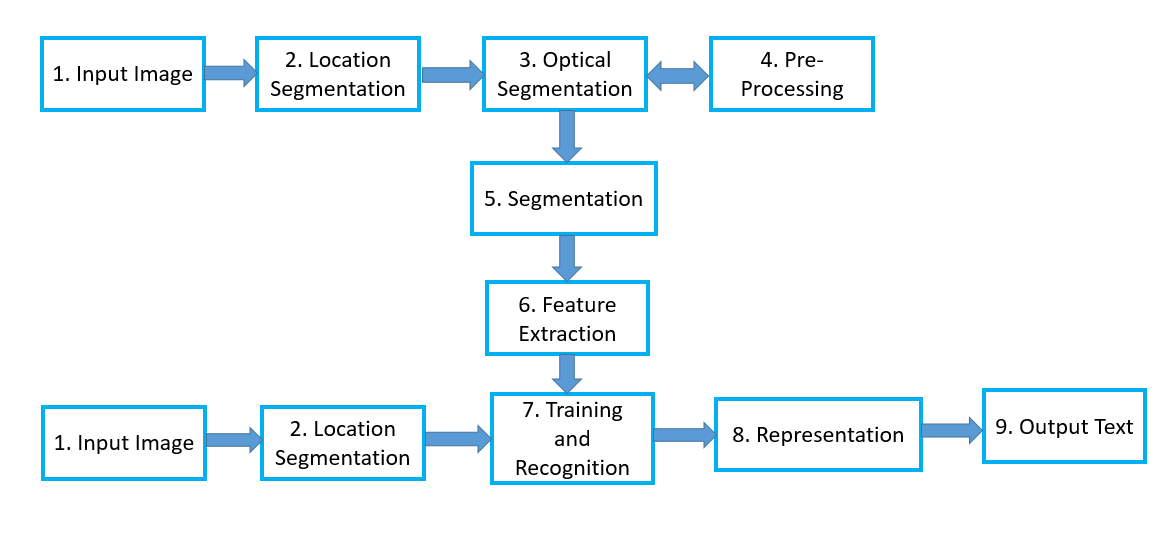

In [71]:
print("Stages of Optical Character Recognition")
Image(filename=r'output2/image.png')

## Text extraction from image with Tesseract software

In [2]:
file = r'output2/sample.jpg'
image = PIL.Image.open(file)
text = pytesseract.image_to_string(image)
print(text)

As he had expected, Mrs. Dursley looked shocked and angry. After all,
they normally pretended she didn't have a sister.

"No," she said sharply. "Why?"

"Funny stuff on the news," Mr. Dursley mumbled. "Owls... shooting
stars... and there were a lot of funny-looking people in town today..."

"So?" snapped Mrs. Dursley.

"Well, I just thought... maybe... it was something to do with... you
know... her crowd."


## Location Segmentation

The next OCR component is location segmentation. Segmentation determines constituents
of an image. It is necessary to locate regions of document which have
printed data and are distinguished from figures and graphics.

###  Word recogntion through OpenCV

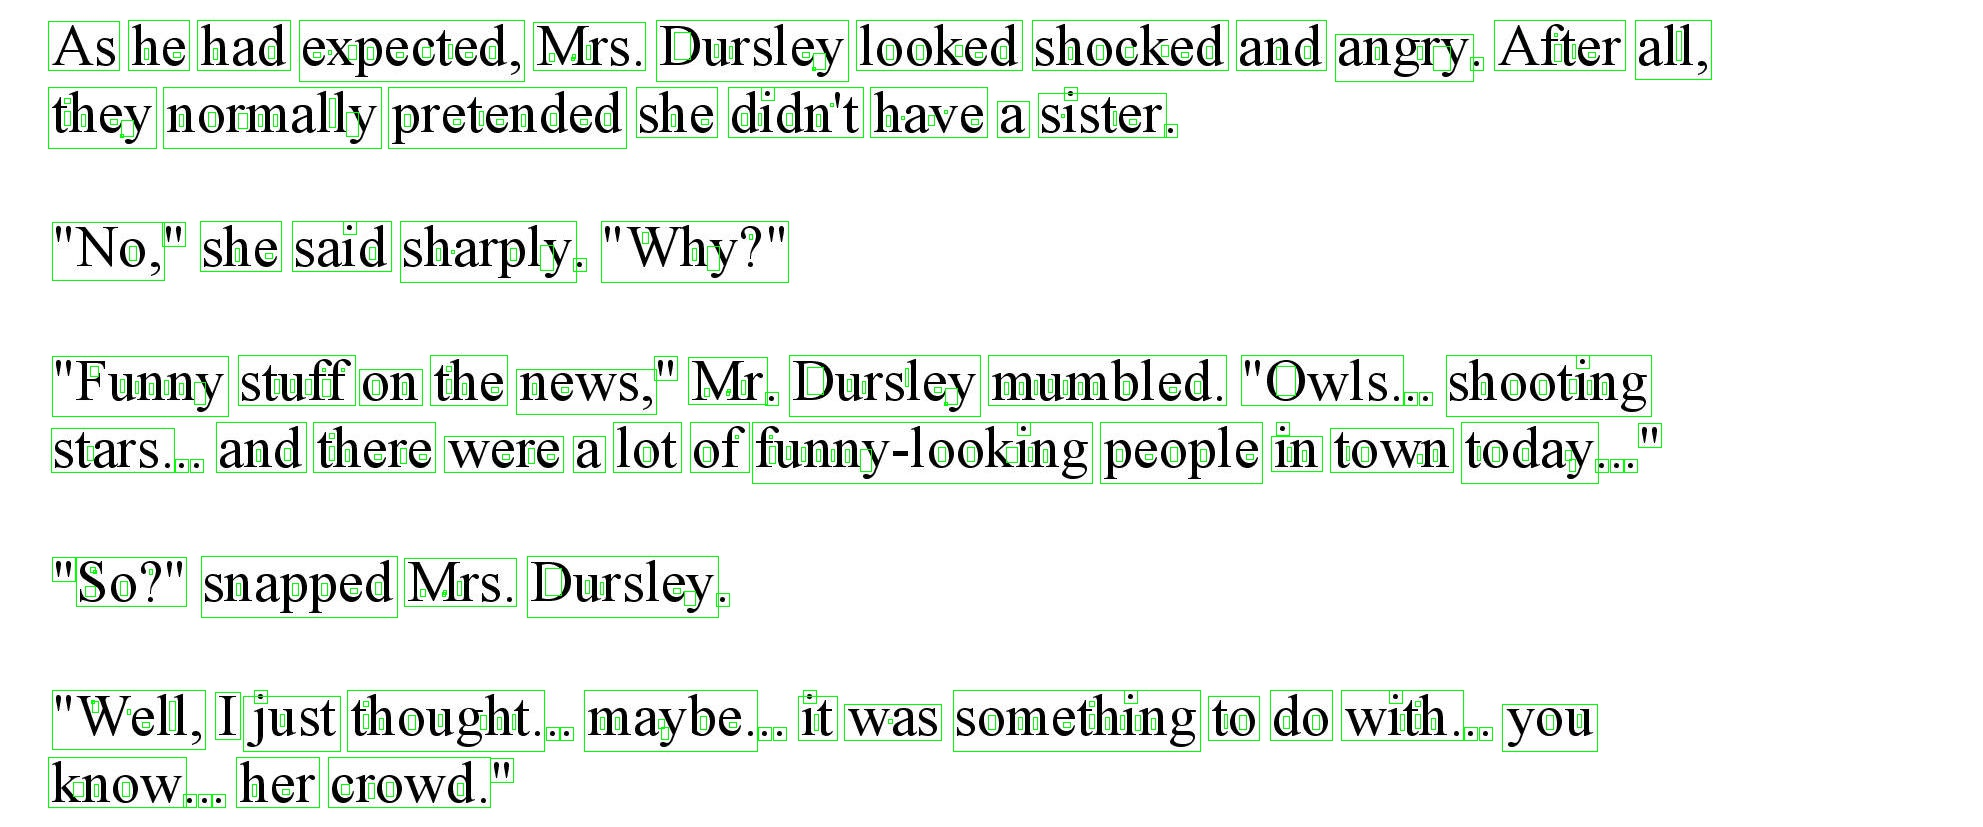

In [81]:
import cv2
import os
import numpy as np
#files = os.listdir(r'letters/harry.jpeg',0)
file =  r'output2/sample.jpg'
im1 = cv2.imread(file,0)
im = cv2.imread(file)

ret,thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(thresh1,kernel,iterations = 2)
_,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    #bound the images
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)

cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
cv2.imwrite('output2/BindingBox4.jpg',im)

from IPython.display import Image
Image(filename='output2/BindingBox4.jpg')

## Optical Scanning

In OCR optical scanners are used which consist of transport mechanism and sensing device that converts light intensity
into grey levels. Printed documents consist of black print on white background.
When performing OCR multilevel image is converted into bi-level black and white
image. This process known as thresholding is performed on scanner to save memory
space and computational effort. The thresholding process is important as the
results of recognition are totally dependent on quality of bi-level image.

### Character recogntion through OpenCV

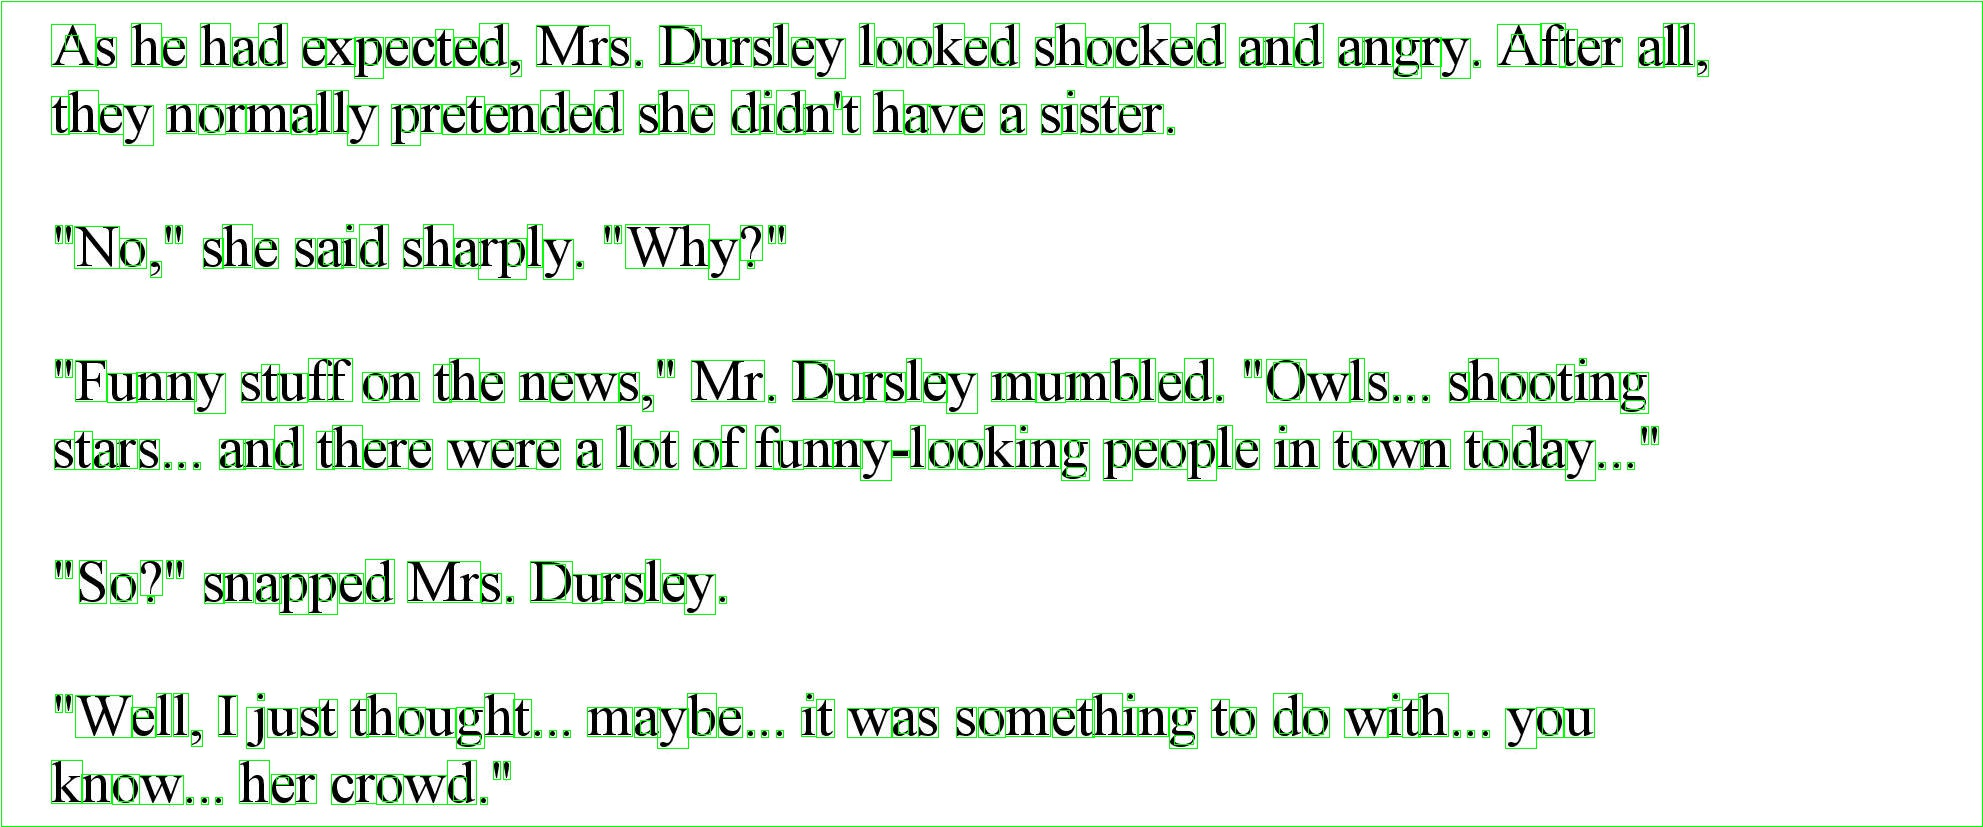

In [80]:
import cv2
import os
import numpy as np
#files = os.listdir(r'letters/harry.jpeg',0)
file = r'output2/sample.jpg'
#file = r'/home/naga/Documents/Naga/Machine Learning/Data_extract/data/1 (3).jpg'
im1 = cv2.imread(file,0)
im = cv2.imread(file)
ret,thresh1 = cv2.threshold(im1,180,278,cv2.THRESH_BINARY)
_,contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	#bound the images
	cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)
i=0
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	#following if statement is to ignore the noises and save the images which are of normal size(character)
	#In order to write more general code, than specifying the dimensions as 100,
	# number of characters should be divided by word dimension
	if w>100 and h>100:
		#save individual images
		cv2.imwrite(str(i)+".jpg",thresh1[y:y+h,x:x+w])
		i=i+1
cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
cv2.imwrite('output2/BindingBox3.jpg',im)
from IPython.display import Image
Image(filename='output2/BindingBox3.jpg')

## Characters recognised through pytesseract (creating boundaries)

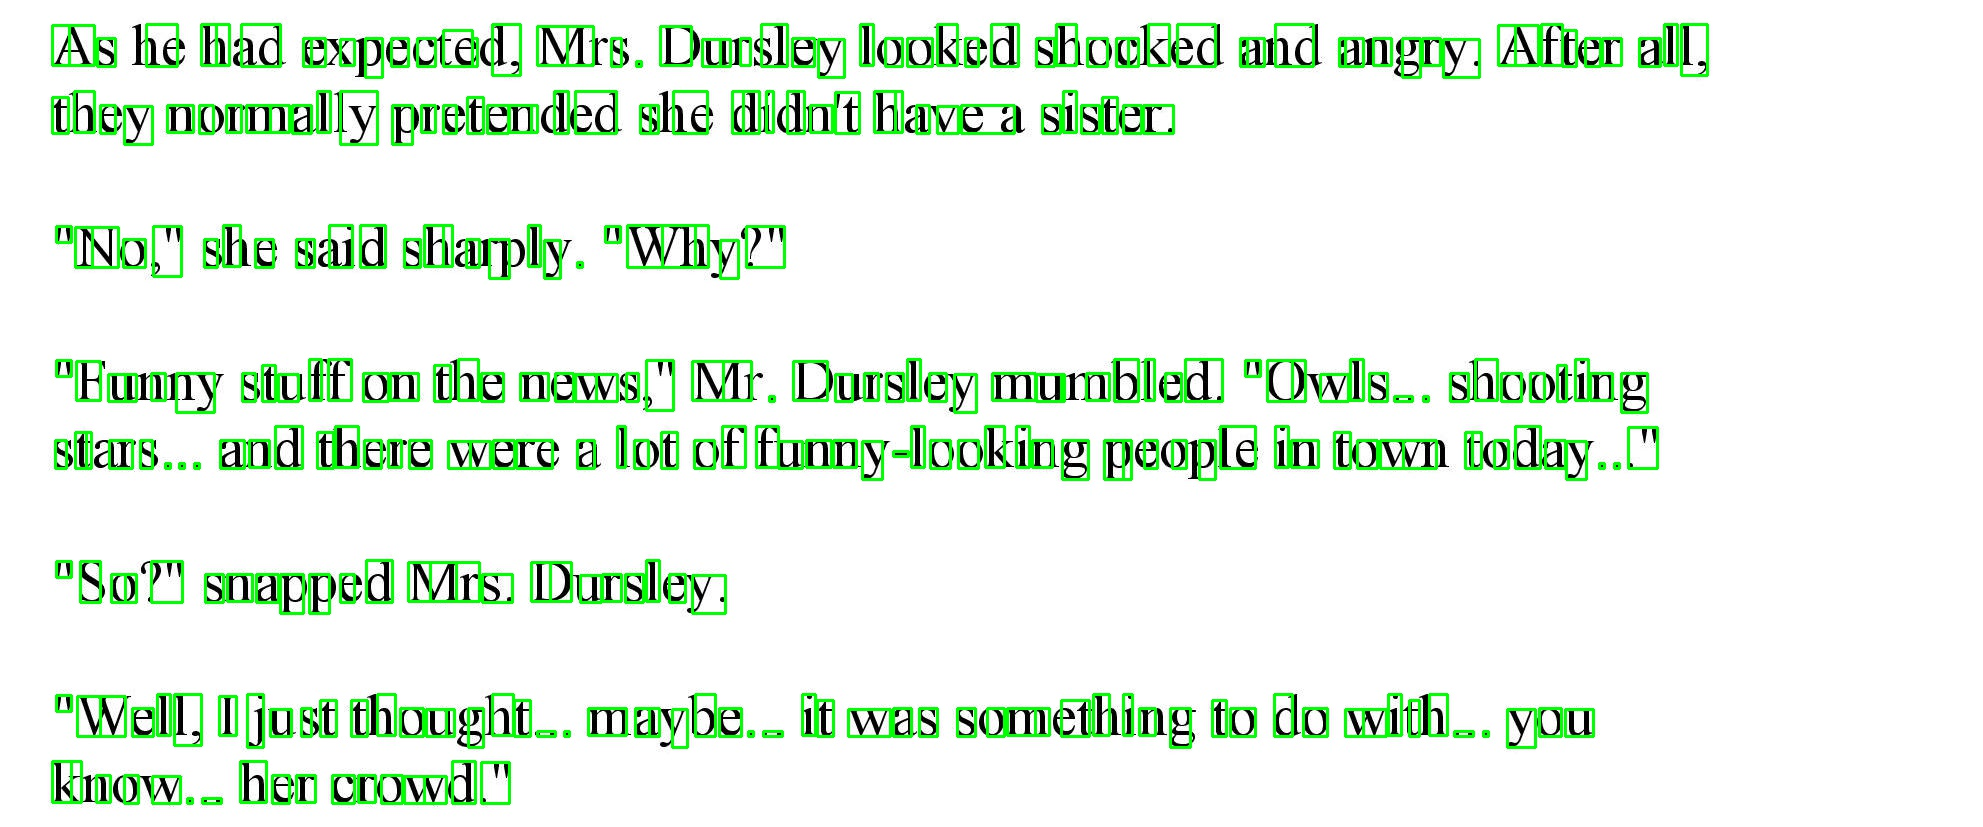

In [3]:
# read the image and get the dimensions
img = cv2.imread(file)
h, w, _ = img.shape # assumes color image

# run tesseract, returning the bounding boxes
boxes = pytesseract.image_to_boxes(img).split('\n') # also include any config options you use
# Box = list(map(lambda box:(box[:1],list(map(int,box[2:][:-2].split(' ')))),boxes))

# draw the bounding boxes on the image
for b in boxes:
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
# show annotated image and wait for keypress
# cv2.imshow(files[0], img)

cv2.imwrite('exboxe.jpg',img)

from IPython.display import Image
Image(filename='exboxe.jpg')

In [79]:
contours[0].shape

(8, 1, 2)

In [35]:
# For each contour, find the bounding rectangle and draw it
count = 0
for component in zip(contours, hierarchy[0]):
    currentContour = component[0]
    currentHierarchy = component[1]
    x,y,w,h = cv2.boundingRect(currentContour)
    if currentHierarchy[3] <= 0:
        # these are the outermost parent components
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,128),1)
        count = count + 1
        letter = im[y:y+h,x:x+w]
        cv2.imwrite('output2/words/l-{}.jpg'.format(count),letter)
#     elif currentHierarchy[2] < 0:
#         # these are the innermost child components
#         cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

# Finally show the image
cv2.imwrite('img.jpg',im)
print(count)

102


## Pre-processing

1) The raw data depending on the data
acquisition type is subjected to a number of preliminary processing steps to make it
usable in the descriptive stages of character analysis. The image resulting from scanning
process may contain certain amount of noise

2) Smoothing implies both filling
and thinning. Filling eliminates small breaks, gaps and holes in digitized characters
while thinning reduces width of line.

    (a) noise reduction

    (b) normalization of the data and

    (c) compression in the amount of information to be retained.

### a.  Noise Reduction
Noise reduction: The noise introduced by the optical scanning device or the
writing instrument causes disconnected line segments, bumps and gaps in
lines, filled loops, etc. The distortion including local variations, rounding of
corners, dilation and erosion is a potential problem.
    
    (i) filtering
    (ii) morphological operations and 
    (iii) noise modeling.

### b. Normalization: 
The normalization methods aim to remove the variations of the
writing and obtain standardized data. Some of the commonly used methods
for normalization are 
    
    (i) skew normalization and baseline extraction
    (ii) slant normalization 
    (iii) size normalization and 
    (iv) contour smoothing

In [9]:
# reading label for all image data
letters = [j[:-4][-1] for j in os.listdir(r'data\words')]
letter_dict = dict([(k,[j for j in os.listdir(r'data\words') if j[:-4][-1] ==k])  for k in Counter(letters).keys()])

In [10]:
encod_y = dict(zip(np.unique(letters),np.arange(len(np.unique(letters)))))

In [12]:
for i in letter_dict['.']:
    shutil.copyfile(r'data\words\\'+i,r'data\letters\check\\'+i)

In [4]:
# # Copying each label data in specific folder name by creating
# import shutil
# for i in letter_dict.keys():
#     if not os.path.exists(r'data\letters\\'+i):
#         os.mkdir(r'data\letters\\'+i)
#     for j in letter_dict[i]:
#         shutil.copyfile(r'data\words\\'+j,r'data\letters\\'+i+'\\'+j)
        

In [5]:
# # Duplicating the files with different names for each less than 10 number
# to_copy = [(i,j) for i,j in Counter(letters).items() if j < 50]
# for key in to_copy:
#     for let in letter_dict[key[0]]:
#         [shutil.copyfile(r'data\words\\'+let,r'data\words\\l-'+str(co)+'-l'+key[0]+'.jpg') for co in np.arange(4010,4060)]

In [13]:
data = []
data_y = []
for key in letter_dict.keys():
    for let in letter_dict[key]:
        im = PIL.Image.open(os.path.join(r'data\words',let))
        data.append(np.array(im.resize([32,32],PIL.Image.ANTIALIAS)))
        data_y.append(encod_y[key])
        
#Image.fromarray(da1[345])
data = np.array(data).reshape((len(data),32,32,3))
data_y = np.array(data_y).reshape(len(data_y),1)

In [14]:
shfl = np.arange(len(data))
np.random.shuffle(shfl)

In [15]:
X_train,y_train = data[shfl[:int(len(data)*0.8)]],data_y[shfl[:int(len(data)*0.8)]]
X_test,y_test = data[shfl[int(len(data)*0.8):]],data_y[shfl[int(len(data)*0.8):]]

h


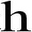

In [16]:
n = 376
for i in encod_y.keys():
    if encod_y[i]==data_y[n][0]:
        print(i)
PIL.Image.fromarray(data[n])

a


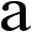

In [17]:
for i in encod_y.keys():
    if encod_y[i]==y_train[n][0]:
        print(i)
PIL.Image.fromarray(X_train[n])

In [18]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import keras
import keras_metrics
K.set_image_dim_ordering('th')
import tensorflow as tf
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage


def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

@as_keras_metric
def auc_pr(y_true, y_pred, curve='PR'):
    return tf.metrics.auc(y_true, y_pred, curve=curve)

# load data
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
y_train_unq, y_train_ids = np.unique(y_train, return_inverse=True)
y_test_unq,y_test_ids  = np.unique(y_test, return_inverse=True)

In [20]:
y_train = keras.utils.np_utils.to_categorical(y_train_ids,len(y_train_unq))
y_test = keras.utils.np_utils.to_categorical(y_test_ids,len(y_test_unq))

In [27]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)



In [30]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image.py:1213: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (2218, 32, 32, 3) (32 channels).
  ' channels).')


In [33]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(41, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

# model.compile(loss='categorical_crossentropy', optimizer=sgd, 
#               metrics=['categorical_accuracy',keras_metrics.precision(), keras_metrics.recall()])
class_value = 1
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics = [auc_pr]) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 3)         9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 16, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

In [ ]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_test,y_test),
                    steps_per_epoch=len(X_train) / 32, epochs=50)

# # here's a more "manual" example
# for e in range(epochs):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
#         model.fit(x_batch, y_batch)
#         batches += 1
#         if batches >= len(x_train) / 32:
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break

In [26]:
model.predict(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
y_.argmax(1)

NameError: name 'y_code' is not defined

In [37]:
model.predict(X_test).argmax(1)

array([26, 29, 26, 29, 33, 29, 29, 26, 26, 26, 26, 26, 26, 39, 26, 29, 26,
       26, 26, 26, 26, 29, 33, 29, 26, 26, 29, 29, 26, 26, 26, 29, 26, 29,
       39, 26, 29, 26, 26, 29, 26, 26,  1, 26, 26, 26, 26, 29, 26, 29, 29,
       26, 26, 29, 26, 29, 26, 26, 33, 26, 26, 29, 26, 26, 29, 26, 33, 26,
       26, 26, 26, 26, 39, 26, 26, 26, 29, 26, 29, 26, 29, 29, 26, 29, 26,
       26, 26, 26, 26, 26, 29, 26,  1, 26, 26, 29, 26, 29, 26, 26, 26, 29,
       26, 26, 26, 29, 26, 29, 26, 26, 29, 26, 29, 26, 26, 29, 26, 26, 26,
       26, 29, 26, 26, 29, 26, 26, 26, 26, 26, 29, 26, 26, 26, 26, 29, 29,
       26, 29, 26, 26, 26, 26, 26, 29, 29, 26, 29, 26, 26, 29, 26, 26, 26,
       26,  1, 26, 29, 26, 26, 26, 29, 26, 26, 26, 26, 26, 29, 29, 29, 29,
       29, 26, 26, 29, 26, 26, 29, 29, 26, 26, 29, 29, 26, 26, 29, 26, 26,
       29, 33,  1, 29, 33, 29, 26, 26, 33, 26, 29, 26, 39, 26, 26, 26, 26,
       29, 33, 26, 26, 26,  1, 39, 26,  1, 29, 33, 26, 26, 26, 26, 26, 33,
       26, 26, 29, 26, 29

In [32]:
uniques, ids = np.unique(y_train, return_inverse=True)

array([19, 20,  4, ..., 32, 34, 10], dtype=int64)

In [28]:
keras.utils.np_utils.normalize(model.predict(X_test))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [382]:
df = pd.DataFrame()
df['Rand'] = np.random.uniform(0,1,10)